# Qiskitの文法の基礎

### インストール

Qiskitは、あなたが量子コンピューティングで必要とするすべてを実行してくれるPythonのパッケージです。

もしまだお持ちでないのなら、インストールする必要があります。インストールしてあるのなら、インポートする必要があります。

一般的に、Qiskitをインストールするには2つのステップが必要です。最初のステップは、Anacondaのインストールです。Anacondaは、あなたが必要とするほぼすべての依存関係を搭載したのPythonパッケージです。Anacondaをインストールすれば、ターミナルで以下のコマンドを実行することでQiskitをインストールできます。
```
pip install qiskit
```
インストール方法の詳細については、 [この文書](https://qiskit.org/documentation/install.html) を参照してください。

**注：この後のセクションは、既に量子コンピューティングの基礎を知っている人向けです。** 後続の章に直ぐに移動してそのコンセプトを利用したい読者が利用できるものです。その他の読者は、まず[Introduction to Python and Jupyter notebooks](../ch-prerequisites/python-and-jupyter-notebooks.html) を読み、次に [Chapter 1](../ch-states/introduction.html) の最初に直接移動すべきです。

### 量子回路

In [1]:
from qiskit import *

In [2]:
# For Jupyter Notebooks:
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

Qiskitの心臓部といえるオブジェクトは量子回路です。作り方は以下の通りです。ここでは `qc` としましょう。

In [3]:
qc = QuantumCircuit()

この回路は、量子ビットも出力もなく、現時点で完全に空です。

### 量子レジスター

回路を意味あるものにするためには、量子ビットのレジスタを定義する必要があります。これには、`QuantumRegister` オブジェクトを使用します。 例えば、2つの量子ビットで構成されるレジスターを定義し、それを `qr` としましょう。

In [4]:
qr = QuantumRegister(2,'qreg')

オプションで、 レジスタに`'qreg'` といった名前をつけることもできます。

`add_register` メソッドを使うことで、レジスタを回路に追加できます。また、回路オブジェクトの `qregs` 変数をチェックすることで、追加されたことを確認できます。このガイドは [Jupyter notebook](https://jupyter.org/) を使用しています。Jupyter notebookでは、セルの最終行の出力がセルの下に表示されます：

In [5]:
qc.add_register( qr )

qc.qregs

[QuantumRegister(2, 'qreg')]

回路はいくつかの量子ビットを持っていますので、別の属性 `draw()`、を使って、回路がどの様に見えるか確認しましょう。

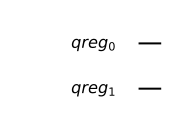

In [6]:
qc.draw(output='mpl')

量子ビットは彼らの旅を始める準備ができましたが、今は単純に状態 $\left|0\right\rangle$ にいるだけです。

#### ゲートの適用

何かを起こさせるには、ゲートを追加する必要があります。例えば、 `h()` を試してみましょう。

In [6]:
qc.h()

TypeError: h() missing 1 required positional argument: 'qubit'

この操作をどの量子ビットに作用させるか指定しなかったため、エラーが発生しました。レジスタ `qr` 内の2つの量子ビットは、`qr[0]` と `qr[1]` として別々にアクセスできます。

In [8]:
qc.h(qr[0])

上記出力は無視してください。セルの最終行に `=` がない場合、Jupyter notebookはこの様な出力をします。上の場合、QiskitにてHadamard が定義されていることを伝えています。この出力を抑制したい場合は、 `;` を使用します。

`cx` を使って、制御NOTを追加することもできます。これは2つの引数、制御量子ビットとターゲット量子ビットを必要とします。

In [9]:
qc.cx(qr[0], qr[1]);

回路を表示させましょう。

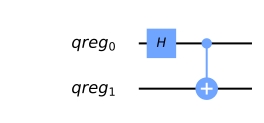

In [10]:
qc.draw(output='mpl')

### Statevector simulator

回路の出力を実際に見ることができるステージにやってきました。具体的には、'statevector simulator' を使用して、2つの量子ビットの状態ベクトルに何が起きているのかを見てみます。

次の行を使用して、シミュレーターを準備します。

In [11]:
vector_sim = Aer.get_backend('statevector_simulator')

Qiskitでは、量子プログラムを実際に実行するもの（シミュレータもしくは実量子デバイス）を *バックエンド* と呼びます。バックエンドに対しジョブを指定するには、対応するバックエンド・オブジェクトを設定する必要があります。

必要なシミュレータは、Qiskitの`Aer`と呼ばれる部分に定義されています。Aerの`get_backend()` メソッドに必要なシミュレータ名を与えることで、必要なバックエンド・オブジェクトを取得できます。今回の名前は `'statevector_simulator'` です。

Aerで利用可能な全シミュレータのリストは、以下の様に取得できます。

In [7]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

これらのシミュレータは全部 'ローカル' 、つまりQiskitがインストールされたマシン上で実行されます。あなたのマシン上で使う場合、IBMQのユーザー同意書に同意せずに実行することができます。

Qiskitの `execute` コマンドでシミュレーションを実行できます。このコマンドには、実行される回路と実行する「バックエンド」（今回はシミュレータ）が必要です。

In [13]:
job = execute(qc, vector_sim)

このコマンドは、`job`と呼ばれるこの実行を操作するオブジェクトを生成します。我々が必要なのは、結果を抽出することです。具体的には、状態ベクトルが欲しいのです。

In [14]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


これはBell状態 $\left( \left|00\right\rangle + \left|11\right\rangle \right)/\sqrt{2}$ に対するベクトルで、私たちがこの回路から期待するものです。

私たちはうまく状態ベクトルを定義できましたが、Qiskitの別の特徴をお見せしましょう。それは次の様に、任意の純粋状態で回路を初期化することが可能なのです。

In [15]:
new_qc = QuantumCircuit(qr)

new_qc.initialize(ket, qr)

### 古典レジスタと qasm simulator

上のシミュレーションでは、statevectorを取り上げました。これは本物の量子コンピューターから得られるものではありません。本物には測定が必要です。測定を操作するためには、結果がどこに保存されるか定義する必要があります。これを実現するのが `ClassicalRegister` です。2つの量子ビットを測定するため、2ビットの古典レジスタを定義しましょう：

In [16]:
cr = ClassicalRegister(2,'creg')

qc.add_register(cr)

ここで、量子回路の`measure` メソッドを使用します。このメソッドは、測定される量子ビットと結果が書き込まれるビットの、2つの引数が必要です。

両方の量子ビットを測定し、その結果を別々のビットに書き込みましょう。

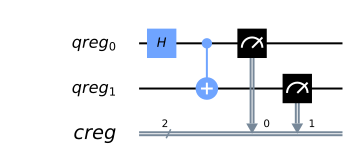

In [17]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

qc.draw(output='mpl')

本物の量子装置をエミュレートする効果のあるローカル・シミュレータ上で、この回路を実行できます このためには、`execute` 関数に別の入力`shots`を追加する必要があります。`shots` は、統計を取るためにこの回路を実行する回数を指定します。指定しない場合は、デフォルトの1024が使用されます。

In [18]:
emulator = Aer.get_backend('qasm_simulator')

job = execute( qc, emulator, shots=8192 )

本質的な結果は、Pythonのdictionary形式のオブジェクトになります。`print`を使用すると、これを表示できます。

In [19]:
hist = job.result().get_counts()
print(hist)

{'11': 4181, '00': 4011}


Qiskitにこの結果をヒストグラムとしてプロットさせることもできます。

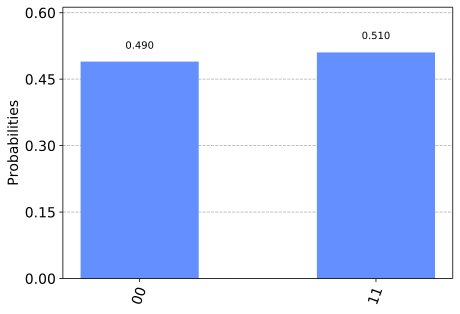

In [20]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

互換性のあるバックエンドに対しては、結果を並べたリストを要求し、取得することもできます。

In [21]:
job = execute(qc, emulator, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['11', '00', '00', '00', '00', '00', '00', '11', '11', '00']


ビットには右から左にラベルが付いていることに注意してください。従って、`cr[0]` は最も右端にあるものになります。 次の例は、`7`と番号付けされた量子ビットだけにPauli $X$ ゲートがあり、`7` と番号付けされたビットに出力が格納される、8量子ビットの回路です。

In [22]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit,bit)

circuit.x(qubit[7])
circuit.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

execute(circuit, emulator, shots=8192).result().get_counts()

{'10000000': 8192}

`1` は左に出現します。

この番号付けは、整数を表現する時のビットの役割を反映しています。



$$ b_{n-1} ~ b_{n-2} ~ \ldots ~ b_1 ~ b_0 = \sum_j ~ b_j ~ 2^j $$



つまり、結果として得られた文字列は、`7`と番号付けされたビットに`1` があるので、 $2^7$ のバイナリ表現です。

### 簡略表記

複数の量子・古典レジスターを回路に追加することができます。しかし、それぞれが一つしか必要ない場合は、簡略表記を使うことができます。

例えば、次を考えましょう。

In [23]:
qc = QuantumCircuit(3)

`QuantumCircuit` の単独引数は、必要な量子ビットの数と解釈されます。つまり、これは、3量子ビットを含む単一量子レジスタを持ち、古典レジスタを持たない回路です。

ゲートを追加する時、3つの量子ビットは、インデックス、0、1、2で参照できます。以下は、Hadamardを量子ビット1に追加した例です。

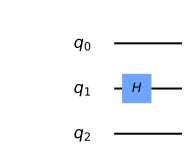

In [24]:
qc.h(1)

qc.draw(output='mpl')

量子レジスタと古典レジスタを両方回路に定義するためには、 `QuantumCircuit` に2つの引数を与えます。最初の引数は量子ビットの数として、2番目はビットの数として解釈されます。以下は、出力に単一古典ビットを持つ2量子ビット回路の例です。

In [25]:
qc = QuantumCircuit(2,1)

これを実際に見てみるために、単純な回路を使用します。測定を行う際には、インデックスを使って古典レジスタのビットを参照することに注意してください。

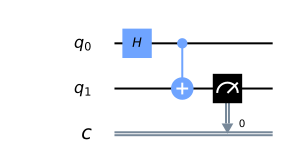

In [26]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw(output='mpl')

### カスタム・ゲートの作成

これまで見てきたように、異なる回路を組み合わせてより大きな回路を作成することができます。また、より洗練されたバージョンとして、カスタムゲートを作成することもできます。例えば、量子ビット1にプロセスを仲介させて、量子ビット0と2の間で `cx` を実装する回路を次に示します。

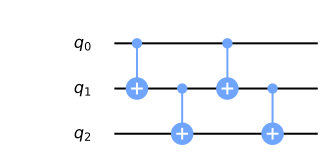

In [27]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output='mpl')

これを1つのゲートに変換して：

In [28]:
toggle_cx = sub_circuit.to_instruction()

その後、選択した量子ビットのセットを使って、別な回路に挿入できます。

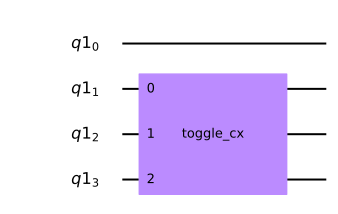

In [29]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])

new_qc.draw(output='mpl')

### 実量子ハードウェアへのアクセス

`IBMQ` パッケージを使用して、バックエンド・オブジェクトを設定することもできます。 これらを使用するには、[IBMQアカウントで署名する](https://qiskit.org/documentation/install.html#access-ibm-q-systems) 必要があります。資格情報が既にコンピューターに読み込まれていると仮定して、サインインします。

In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

次に、使用可能な追加のバックエンドを見てみましょう。

In [8]:
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


一つのシミュレーター、そして残りは量子デバイスのプロトタイプです。

`status()` メソッドを使用すると、それらの状態を確認できます。

In [32]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=21, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.6', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=127, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=131, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=13, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=12, status_msg='active')
Back

最大のパブリック・デバイスに対するバックエンド・オブジェクトを取得しましょう。

In [33]:
real_device = provider.get_backend('ibmq_16_melbourne')

これを使用して、エミュレーターと全く同じ方法でデバイス上でジョブを実行できます。

プロパティの一部を抽出することもできます。

In [34]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

これから、デバイスのノイズを模倣するノイズ・モデルを構築できます（ノイズ・モデルについては本教科書にて後述します）。

In [35]:
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(properties)

そして、エミュレータでジョブを実行し、実デバイスのこれらの機能をすべて再現します。 以下は、ノイズのない場合に `'10'` を出力する回路の例です。

In [36]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

job = execute(qc, emulator, shots=1024, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates)

job.result().get_counts()

{'01': 1, '00': 39, '11': 4, '10': 980}

以上で非常に基本的なことを説明しましたので、量子ビットと量子回路とは何か、さらに学んでいきましょう。

In [37]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}